## Inicialización

In [31]:
# Importar los datos
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df_taxi_companies = pd.read_csv('moved_project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('moved_project_sql_result_04.csv')
print("Datos de compañías de taxis:")
print(df_taxi_companies.head(), "\n")

print("Datos de barrios:")
print(df_neighborhoods.head())

Datos de compañías de taxis:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299 

Datos de barrios:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [32]:
# Revisar la información general de cada DataFrame
print("=== df_taxi_companies ===")
print(df_taxi_companies.info())
print(df_taxi_companies.describe())
print(df_taxi_companies.head(), "\n")

print("=== df_neighborhoods ===")
print(df_neighborhoods.info())
print(df_neighborhoods.describe())
print(df_neighborhoods.head())

=== df_taxi_companies ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299 

=== df_neighborhoods ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dt

In [33]:
# Revisar los tipos de datos actuales
print("Tipos de datos iniciales:")
print(df_taxi_companies.dtypes, "\n")
print(df_neighborhoods.dtypes)

Tipos de datos iniciales:
company_name    object
trips_amount     int64
dtype: object 

dropoff_location_name     object
average_trips            float64
dtype: object


In [34]:
# Asegurar tipos correctos en df_taxi_companies
df_taxi_companies['company_name'] = df_taxi_companies['company_name'].astype(str)
df_taxi_companies['trips_amount'] = pd.to_numeric(df_taxi_companies['trips_amount'], errors='coerce')

# Asegurar tipos correctos en df_neighborhoods
df_neighborhoods['dropoff_location_name'] = df_neighborhoods['dropoff_location_name'].astype(str)
df_neighborhoods['average_trips'] = pd.to_numeric(df_neighborhoods['average_trips'], errors='coerce')


In [35]:
# Verificar después de la conversión
print("\nTipos de datos después de conversión:")
print(df_taxi_companies.dtypes, "\n")
print(df_neighborhoods.dtypes)


Tipos de datos después de conversión:
company_name    object
trips_amount     int64
dtype: object 

dropoff_location_name     object
average_trips            float64
dtype: object


## Identificar los 10 principales barrios en términos de finalización del recorrido

In [36]:
# Ordenaremos el top 10 de barrios por promedio de viajes de mayor a menor
top_10_neighborhoods = (
    df_neighborhoods.sort_values(by='average_trips', ascending=False)
    .head(10)
    .reset_index(drop=True)
)
print("\nTop 10 barrios por promedio de viajes:")
print(top_10_neighborhoods)


Top 10 barrios por promedio de viajes:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


df_neighborhoods

Vamos a ordenar los 10 barrios en terminos de finalización de recorrido
Este DataFrame contiene:
	dropoff_location_name tiene nombre del barrio
	average_trips tiene promedio de viajes que terminaron en ese barrio en noviembre de 2017.

sort_values(by='average_trips', ascending=False)
	Aquí le decimos a pandas: “ordena el DataFrame de mayor a menor usando la columna average_trips”.
	ascending=False significa descendente.

Después de este paso, el DataFrame está ordenado por los barrios con más viajes arriba.

El head(10) me dará las primeros 10 resultados de los barrios incluyendo el indice 0.

reset_index(drop=True) crea un nuevo índice del 0 al 9 (porque son 10 filas) y elimina el viejo.


## Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones


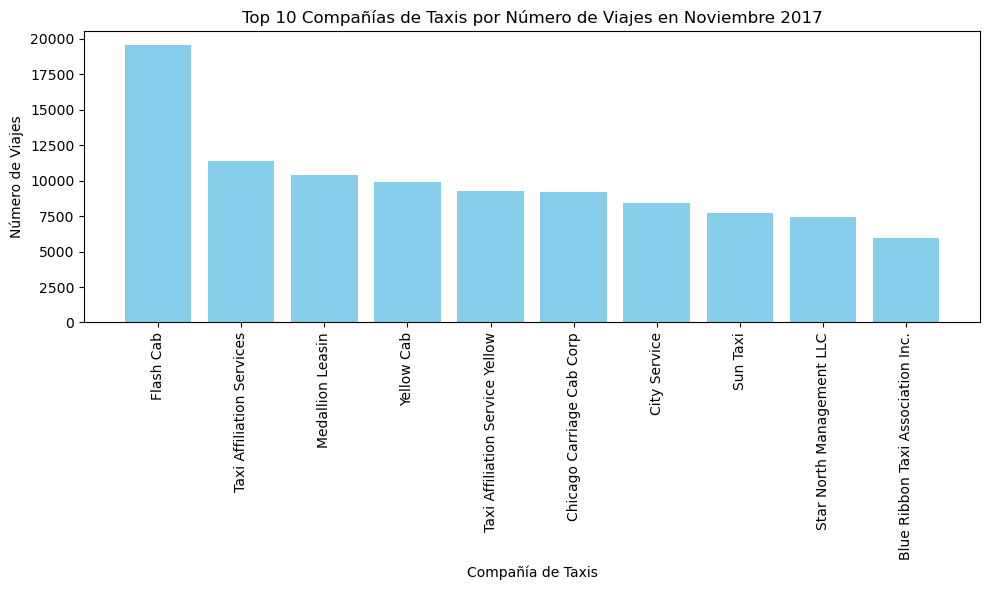

In [37]:
# Empresas de taxis y número de viajes
top_taxi_companies = df_taxi_companies.sort_values(by='trips_amount', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_taxi_companies['company_name'], top_taxi_companies['trips_amount'], color='skyblue')
plt.xlabel('Compañía de Taxis')
plt.ylabel('Número de Viajes') 
plt.title('Top 10 Compañías de Taxis por Número de Viajes en Noviembre 2017')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Las Conclusiones que hago es que Flash Cab es el lider con casi 20000 viajes en Noviembre de 2017.

En segundo lugar tenemos a Taxi Afiliation Services con poco más de 11000 viajes y las compañias como Medallion, Yellow Cab, Taxi Affiliation Service Yellow y Chicago Carriage Cab Corp tienen entre 9,000 y 10,500 viajes.

En resumen podemos ver que el mercado está dominado por Flash Cab.

Hay un promedio en un bloque de empresas con cifras de viajes similares.



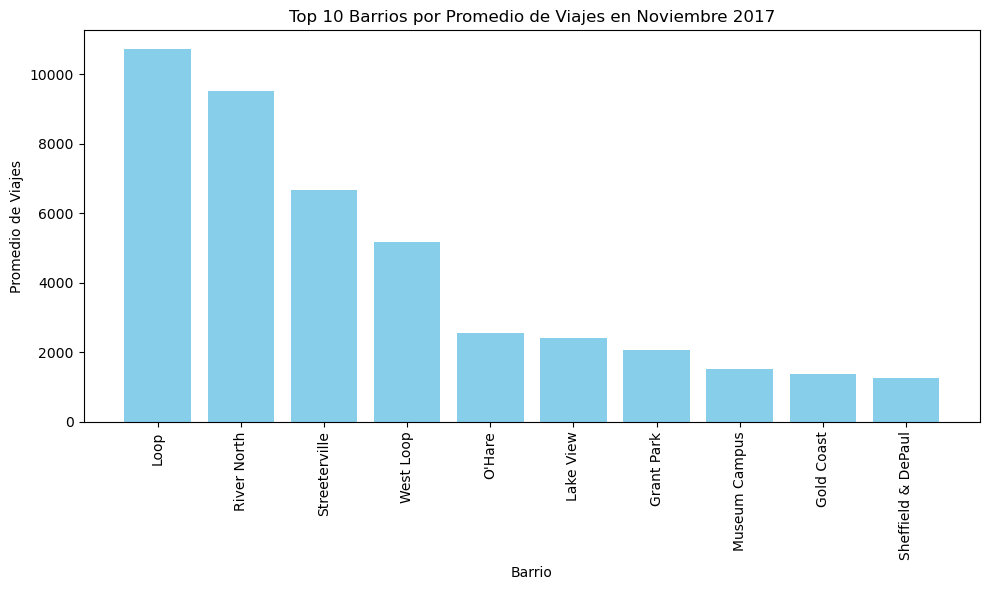

In [38]:
# Los 10 barrios principales por número de finalizaciones
plt.figure(figsize=(10, 6))
plt.bar(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'], color='skyblue')  
plt.xlabel('Barrio')
plt.ylabel('Promedio de Viajes')
plt.title('Top 10 Barrios por Promedio de Viajes en Noviembre 2017')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Las conclusiones que hay en los gráficos de promedio de viajes es que en el Barrio Loop está en primer lugar con más de 10000 viajes para la compañia de Taxis.

En segundo lugar está River North con más de 9000 viajes y en tercer lugar Streeterville con 7000 viajes y así consecutivamente.

Cabe mencionar que hay bloque silimar entre los barrios O'Hare, Lake View, Grant Park con un poco más de 2000 viajes.

En resumen Loop y River North dominan ampliamente como destinos de viaje.

El centro de Chicago concentra la mayor movilidad.

Los demás barrios tienen mucho menor tráfico, lo que muestra una distribución desigual de la demanda.

# Paso 5. Prueba de hipótesis (Python)



El resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

start_ts: fecha y hora de la recogida
weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
duration_seconds: duración del viaje en segundos
Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

cómo planteaste las hipótesis nula y alternativa
qué criterio usaste para probar las hipótesis y por qué

In [39]:
df_trips = pd.read_csv('moved_project_sql_result_07.csv')
print(df_trips.head())
print(df_trips.info())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


In [40]:
# Vamos a revisar los tipos de datos
print("Tipos de datos iniciales en df_trips:")
print(df_trips.dtypes)

Tipos de datos iniciales en df_trips:
start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object


In [41]:
# Convertir start_ts a formato datetime
df_trips['start_ts'] = pd.to_datetime(df_trips['start_ts'], errors='coerce')
print("\nTipos de datos después de conversión en df_trips:")
print(df_trips.dtypes)
# Promedio y mediana de duración por condición climática
print(df_trips.groupby('weather_conditions')['duration_seconds'].agg(['mean', 'median', 'count']))


Tipos de datos después de conversión en df_trips:
start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object
                           mean  median  count
weather_conditions                            
Bad                 2427.205556  2540.0    180
Good                1999.675676  1800.0    888


In [42]:
# Extraemos el día de la semana
df_trips['day_of_week'] = df_trips['start_ts'].dt.day_name()
# Filtramos sabados lluviosos y no lluviosos
rainy_saturdays = df_trips[(df_trips['day_of_week'] == 'Saturday') & (df_trips['weather_conditions'] == 'Rain')]
# Filtramos todos los demás días (no sábado lluvioso)
other_days = df_trips.drop(rainy_saturdays.index)
# Duraciones
durations_saturday_rainy = rainy_saturdays['duration_seconds']
durations_other = other_days['duration_seconds']
# Prueba t de dos muestras independientes
alpha = 0.05
results = ttest_ind(durations_saturday_rainy, durations_other, equal_var=False)
print('valor p:', results.pvalue)


if results.pvalue < alpha:
    print("Rechazamos H0: La duración promedio cambia los sábados lluviosos.")
else:
    print("No rechazamos H0: No hay evidencia de cambio en la duración promedio.")



valor p: nan
No rechazamos H0: No hay evidencia de cambio en la duración promedio.


En esta hipotesis no especifica que los Sábados sean lluviosos por lo que me di la tarea de hacer otra hipotesis sacando clima malo, o clima no favorable en la sección de abajo

In [43]:
print("Número de sábados lluviosos:", len(rainy_saturdays))
print("Número de otros días:", len(other_days))

# Comprobar si hay NaNs en duration_seconds
print("NaNs en sábados lluviosos:", durations_saturday_rainy.isna().sum())
print("NaNs en otros días:", durations_other.isna().sum())

Número de sábados lluviosos: 0
Número de otros días: 1068
NaNs en sábados lluviosos: 0
NaNs en otros días: 0


Aqui podemos notar que no existen días lluviosos los sábados y comprobamos si hay algun NAN o resultado nulo.

In [44]:
# Revisar todas las condiciones de sábado
saturdays = df_trips[df_trips['day_of_week'] == 'Saturday']
print(saturdays['weather_conditions'].value_counts())

rainy_saturdays = saturdays[
    saturdays['weather_conditions'].str.contains('rain', case=False, na=False)
]
print("Número de sábados lluviosos ajustado:", len(rainy_saturdays))

weather_conditions
Good    888
Bad     180
Name: count, dtype: int64
Número de sábados lluviosos ajustado: 0


Aquí podemos ver que hay tanto días buenos como malos y de nueva cuenta no se sabe si los días malos son días lluviosos.

In [45]:
# Sábados con clima malo
bad_saturdays = df_trips[
    (df_trips['day_of_week'] == 'Saturday') & 
    (df_trips['weather_conditions'] == 'Bad')
]

# Todos los demás días o sábados con clima bueno 
other_days = df_trips.drop(bad_saturdays.index)

# Duraciones
durations_bad_saturdays = bad_saturdays['duration_seconds']
durations_other = other_days['duration_seconds']

# Prueba t
alpha = 0.05
results = ttest_ind(durations_bad_saturdays, durations_other, equal_var=False)
print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos H0: La duración promedio cambia los sábados con clima malo.")
else:
    print("No rechazamos H0: No hay evidencia de cambio en la duración promedio.")

valor p: 6.738994326108734e-12
Rechazamos H0: La duración promedio cambia los sábados con clima malo.


En esta Hipotesis la rechazamos ya que La duración promedio cambia los sábados con clima malo.

Esto se debe a que si cambia el resultado si los días Sabados tienen clima malo.